In [2]:
import yfinance as yf
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt




In [ ]:
TICKER = 'SPY'
RSI_LENGTH = 14
OVERBOUGHT = 70
OVERSOLD = 30
PERIOD = '730d'
LOOKBACK = 10000
INTERVAL = '1h'
MACD_FAST = 12
MACD_SLOW = 27
MACD_SPAN = 9

def get_data(ticker=TICKER, lookback=LOOKBACK, interval = INTERVAL):
    df=yf.download(ticker,interval=interval, period=PERIOD)
    df.columns = df.columns.get_level_values(0)
    
    df = df.reset_index(drop=True)
    
    #only return the usbset of data interested in
    return df.iloc[-LOOKBACK:,:]


def add_MACD(df, fast=MACD_FAST, slow = MACD_SLOW, span = MACD_SPAN):
    df[f'{fast}_ema'] = df['Close'].ewm(span=fast).mean()
    df[f'{slow}_ema'] = df['Close'].ewm(span=slow).mean()
    
    #macd is the difference between the fast and slow
    df[f'MACD'] = df[f'{fast}_ema'] - df[f'{slow}_ema']
    
    #macd signal is 9-period moving average of this line
    df['Signal'] = df['MACD'].ewm(span = span ).mean()
    
    df['MACD_hist'] = df['MACD'] - df['Signal']

    plt.bar(x=range(len(df)), height = df['MACD_hist'])

    plt.title(f'{MACD_FAST} - {MACD_SLOW} - {MACD_SPAN} MACD Values')
    plt.legend(['MACD', 'SIGNAL'])
    
    return df

def add_RSI(df, length=RSI_LENGTH):
    price_change = df['Close'].diff()
    
    #separate gains/losses
    gain = price_change.where(price_change > 0,0)
    loss = -price_change.where(price_change < 0,0)
    #average gain vs loss
    avg_gain = gain.rolling(window=length).mean()
    avg_loss = loss.rolling(window=length).mean()
    
    #calculate rsi
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    
    df['RSI'] = rsi
    
    #plot the relative strength index
    plt.plot(df['RSI'])
    plt.axhline(OVERBOUGHT, color = 'red')
    plt.axhline(OVERSOLD, color ='green')
    return df.dropna()

def main():
    df = get_data()
    df = add_MACD(df)
    df = add_RSI(df)


/var/folders/yl/gn9fldpj69169vhn466y4klh0000gn/T/ipykernel_1934/1979200284.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df=yf.download(ticker,interval=interval, period=PERIOD)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
4575,622.849976,623.309021,622.059998,622.320007,6764656
4576,623.599976,623.770020,622.820007,622.909973,7703630
4577,623.989990,624.210022,623.409973,623.590027,9243138
4578,623.734802,624.280029,623.010010,624.260010,12432517
4579,625.520020,625.575012,623.744812,623.770020,8535858
...,...,...,...,...,...
5070,663.109985,663.359985,658.140015,659.440002,10154976
5071,661.190002,663.635010,660.549988,663.130005,6951317
5072,664.630005,665.039978,660.710022,661.159973,8819016
5073,665.130005,665.755005,664.030029,664.650024,8491669


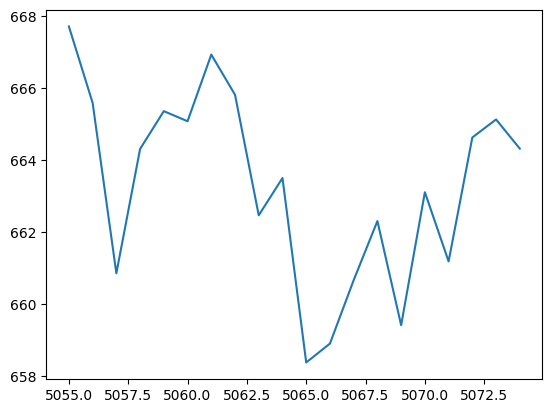

In [14]:
plt.plot(df['Close'])